<a href="https://colab.research.google.com/github/Kaustubh-Atey/Keras-Codes-/blob/master/SimpleRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [0]:
N = 1000
Tp = 800

In [0]:
t = np.arange(0,N)
x = np.sin(0.05*t) + 2 * np.random.rand(N)
df = pd.DataFrame(x)
df.head()

,0
0,1.339953
1,0.213103
2,1.699672
3,1.453439
4,0.341252


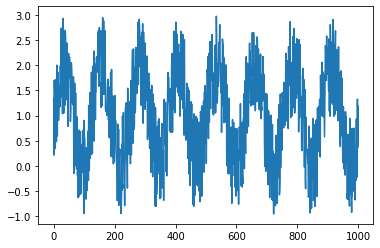

In [0]:
plt.plot(df)
plt.show()

In [0]:
values = df.values
train, test = values[0:Tp,:], values[Tp:N,:]

In [0]:
np.shape(test)

(200, 1)

In [0]:
step = 4

train = np.append(train, np.repeat(test[-1,],step))
test = np.append(test, np.repeat(test[-1,],step))
np.shape(test)

(204,)

In [0]:
def convert_to_matrix(data, step):
  X,Y = [], []
  for i in range(len(data) - step):
    d = i + step
    X.append(data[i:d,])
    Y.append(data[d,])
  return np.array(X), np.array(Y) 

In [0]:
trainX, trainY = convert_to_matrix(train, step)
testX, testY = convert_to_matrix(test, step)

In [0]:
print(np.shape(trainX), trainX)
print(np.shape(trainY))

(800, 4) [[1.33995314 0.21310286 1.69967161 1.45343914]
 [0.21310286 1.69967161 1.45343914 0.34125192]
 [1.69967161 1.45343914 0.34125192 0.54579808]
 ...
 [1.34341189 2.52754018 1.47894958 1.18479401]
 [2.52754018 1.47894958 1.18479401 1.18479401]
 [1.47894958 1.18479401 1.18479401 1.18479401]]
(800,)


In [0]:
trainX = np.reshape(trainX, (trainX.shape[0] ,1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0] ,1, testX.shape[1]))
np.shape(trainX)

(800, 1, 4)

In [0]:
model = Sequential()
model.add(SimpleRNN(units = 32, input_shape = (1, step), activation = 'relu'))
model.add(Dense(8, activation= 'relu'))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'rmsprop')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 32)                1184      
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 1,457
Trainable params: 1,457
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(trainX, trainY, epochs = 10, batch_size = 16, verbose = 2)

In [0]:
model.evaluate(testX, testY)

200/200 [==============================] - 0s 74us/step


0.6163783246278762

In [0]:
predicted_test = model.predict(testX)
predicted_train = model.predict(trainX)

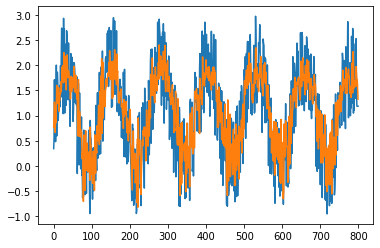

In [0]:
plt.plot(trainY)
plt.plot(predicted_train)
plt.show()

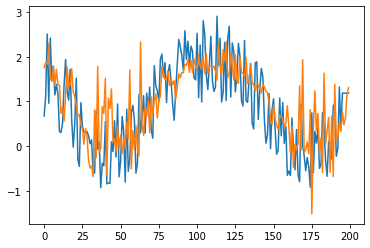

In [0]:
plt.plot(testY)
plt.plot(predicted_test)
plt.show()